In [2]:
import os
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sys.path.append('../src/')
import CONST
regex = re.compile('[^a-zA-Z0-9]')

f_trn = os.listdir(CONST.INTRNDIR)
f_tst = os.listdir(CONST.INTSTDIR)

trn = pd.DataFrame() 
tst = pd.DataFrame()
for f in f_trn:
    _df = pd.read_csv(os.path.join(CONST.INTRNDIR, f),
                                   encoding='shift-jis', usecols=list(range(0, 25)))
    _df['Engine'] = 'Train' + f.split('.')[0].split('_')[2]
    _df['Flight No'] = _df.index.values + 1
    trn = pd.concat([trn, _df], axis=0).reset_index(drop=True)
for f in f_tst:
    _df = pd.read_csv(os.path.join(CONST.INTSTDIR, f),
                                   encoding='shift-jis', usecols=list(range(0, 25)))
    _df['Engine'] = 'Test' + f.split('.')[0].split('_')[2]
    _df['Flight No'] = _df.index.values + 1
    tst = pd.concat([tst, _df], axis=0).reset_index(drop=True)
    
trn.columns = ["".join(regex.sub('', c.title()).split(' ')).strip() for c in trn.columns]
tst.columns = ["".join(regex.sub('', c.title()).split(' ')).strip() for c in tst.columns]
trn.head()

Altitude    Mach  FlightRegime  PowerSettingTra  \
0    34.998  0.8400             5              100   
1    41.998  0.8408             6              100   
2    24.999  0.6218             4               60   
3    42.008  0.8416             6              100   
4    25.000  0.6203             4               60   

   T2TotalTemperatureAtFanInletR  T24TotalTemperatureAtLpcOutletR  \
0                         449.44                           555.32   
1                         445.00                           549.90   
2                         462.54                           537.31   
3                         445.00                           549.51   
4                         462.54                           537.07   

   T30TotalTemperatureAtHpcOutletR  T50TotalTemperatureAtLptOutletR  \
0                           1358.6                           1137.2   
1                           1353.2                           1125.8   
2                           1256.8                           1047.5   
3                           1354.0                           1126.4   
4                           1257.7                           1047.9   

   P2PressureAtFanInletPsia  P15TotalPressureInBypassDuctPsia    ...     \
0                      5.48                              8.00    ...      
1                      3.91                              5.71    ...      
2                      7.05                              9.02    ...      
3                      3.91                              5.71    ...      
4                      7.05                              9.03    ...      

   NrcCorrectedCoreSpeedRpm  BprBypassRatio  FarbBurnerFuelAirRatio  \
0                    8048.6          9.3461                    0.02   
1                    8072.3          9.3774                    0.02   
2                    7864.9         10.8940                    0.02   
3                    8068.7          9.3528                    0.02   
4                    7861.2         10.8960                    0.02   

   HtbleedBleedEnthalpy  NfDmdDemandedFanSpeedRpm  \
0                   334                      2223   
1                   330                      2212   
2                   309                      1915   
3                   329                      2212   
4                   309                      1915   

   PcnfrDmdDemandedCorrectedFanSpeedRpm  W31HptCoolantBleedLbmS  \
0                                100.00                   14.73   
1                                100.00                   10.41   
2                                 84.93                   14.08   
3                                100.00                   10.59   
4                                 84.93                   14.13   

   W32LptCoolantBleedLbmS    Engine  FlightNo  
0                  8.8071  Train001         1  
1                  6.2665  Train001         2  
2                  8.6723  Train001         3  
3                  6.4701  Train001         4  
4                  8.5286  Train001         5  

[5 rows x 27 columns]

In [3]:
trn.columns

Index(['Altitude', 'Mach', 'FlightRegime', 'PowerSettingTra',
       'T2TotalTemperatureAtFanInletR', 'T24TotalTemperatureAtLpcOutletR',
       'T30TotalTemperatureAtHpcOutletR', 'T50TotalTemperatureAtLptOutletR',
       'P2PressureAtFanInletPsia', 'P15TotalPressureInBypassDuctPsia',
       'P30TotalPressureAtHpcOutletPsia', 'NfPhysicalFanSpeedRpm',
       'NcPhysicalCoreSpeedRpm', 'EprEnginePressureRatioP50P2',
       'Ps30StaticPressureAtHpcOutletPsia', 'PhiRatioOfFuelFlowToPs30PpsPsi',
       'NrfCorrectedFanSpeedRpm', 'NrcCorrectedCoreSpeedRpm', 'BprBypassRatio',
       'FarbBurnerFuelAirRatio', 'HtbleedBleedEnthalpy',
       'NfDmdDemandedFanSpeedRpm', 'PcnfrDmdDemandedCorrectedFanSpeedRpm',
       'W31HptCoolantBleedLbmS', 'W32LptCoolantBleedLbmS', 'Engine',
       'FlightNo'],
      dtype='object')

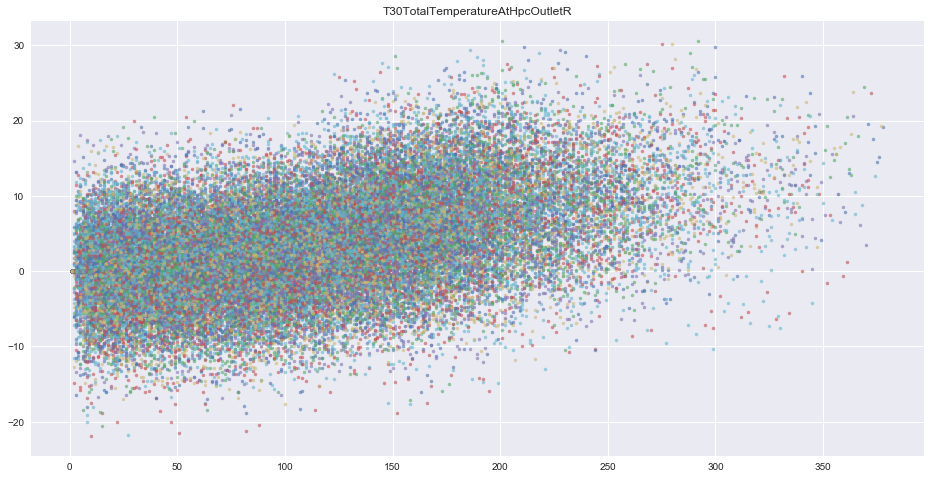

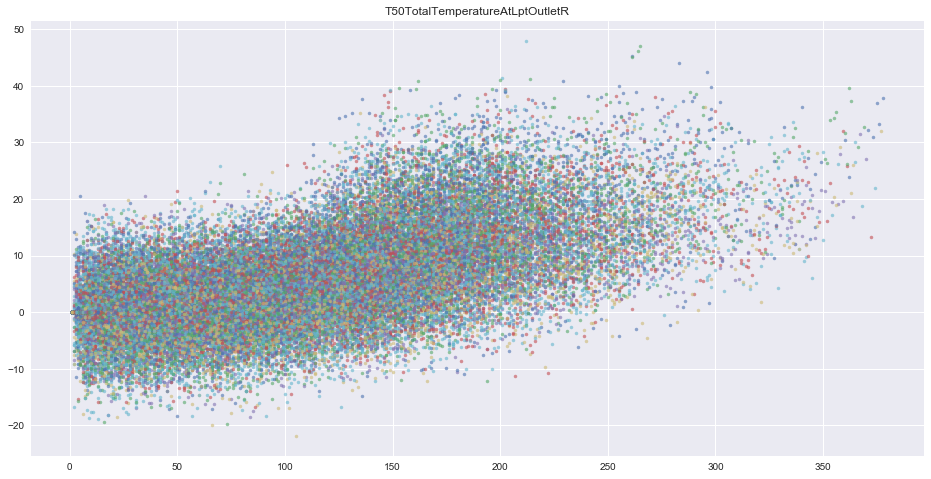

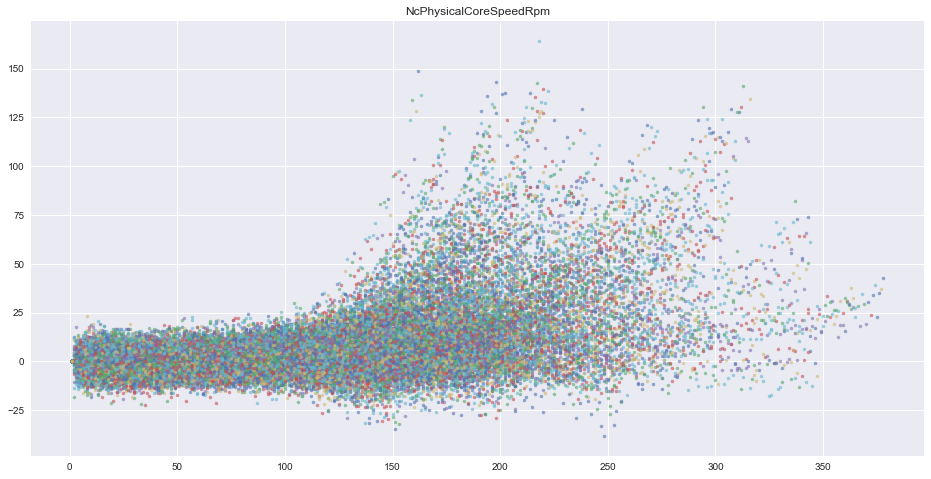

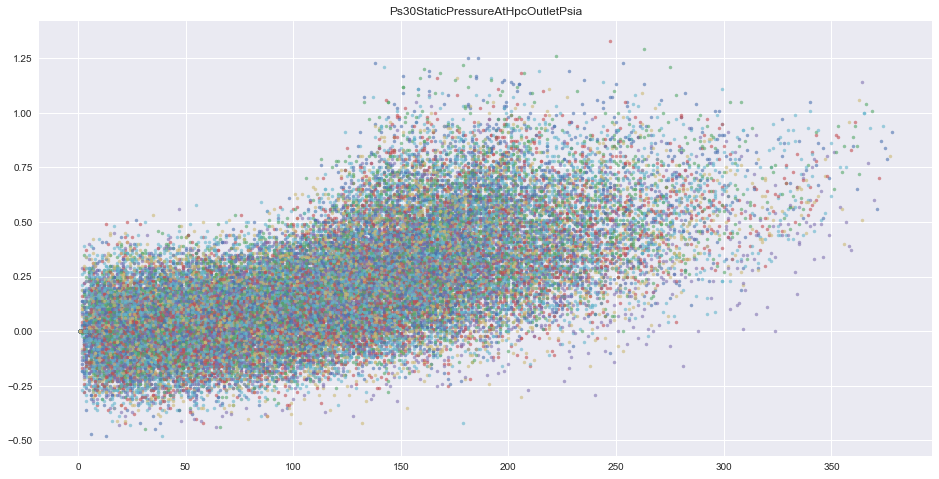

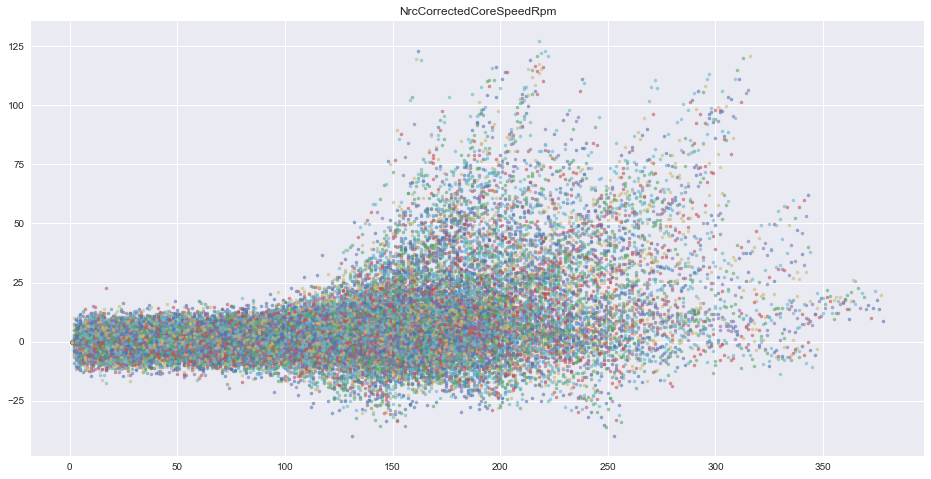

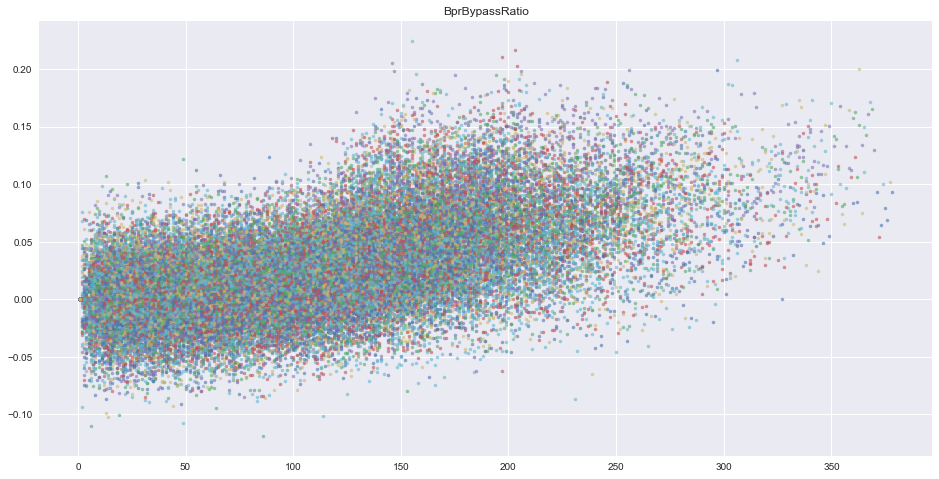

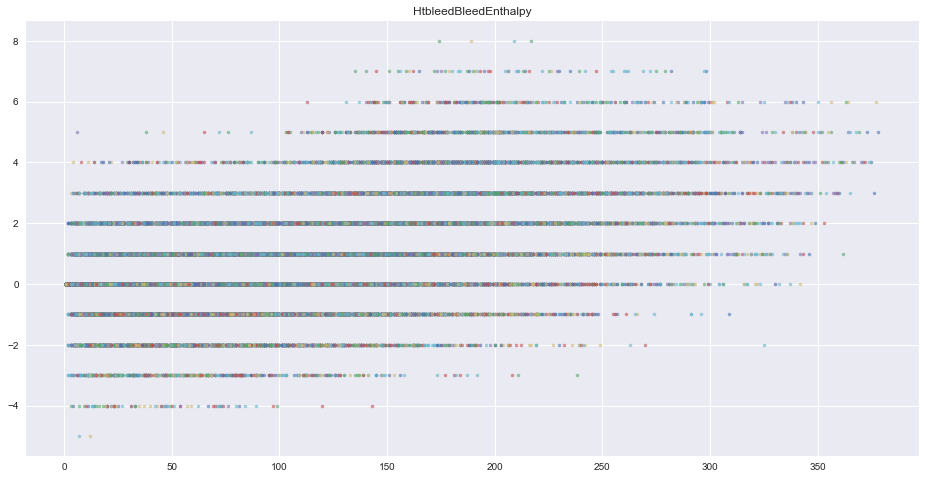

In [4]:
cp = sns.color_palette(n_colors=6)
for c in ["T30TotalTemperatureAtHpcOutletR", "T50TotalTemperatureAtLptOutletR",
          "NcPhysicalCoreSpeedRpm",  "Ps30StaticPressureAtHpcOutletPsia",
          "NrcCorrectedCoreSpeedRpm", "BprBypassRatio", "HtbleedBleedEnthalpy"]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c] - _g[c].iloc[0], '.', c=cp[r-1], alpha=.6)    
    plt.show()

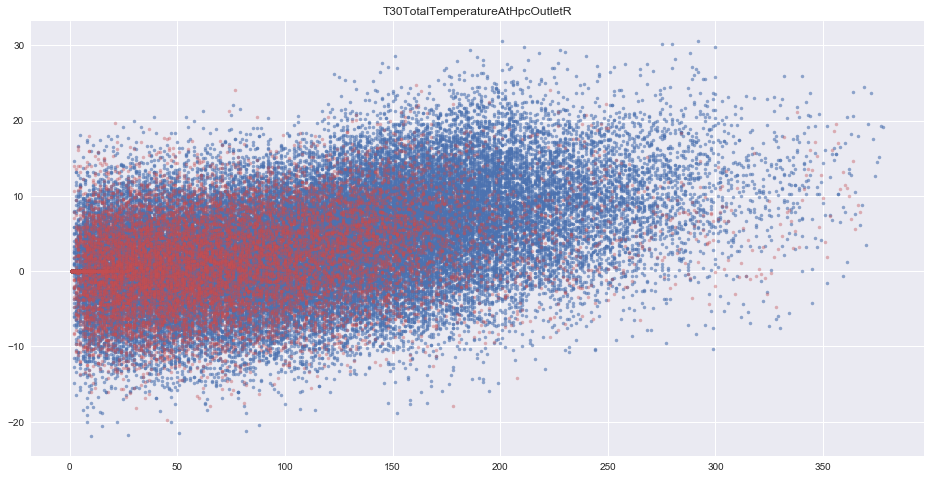

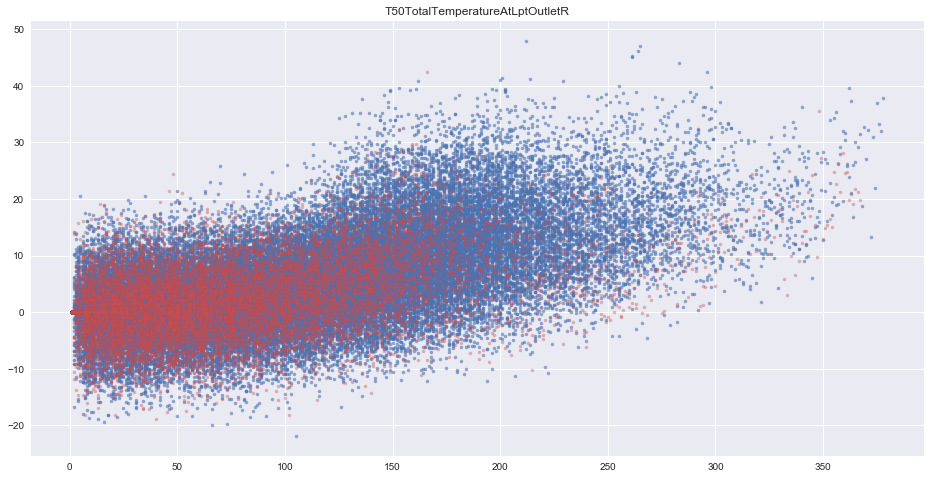

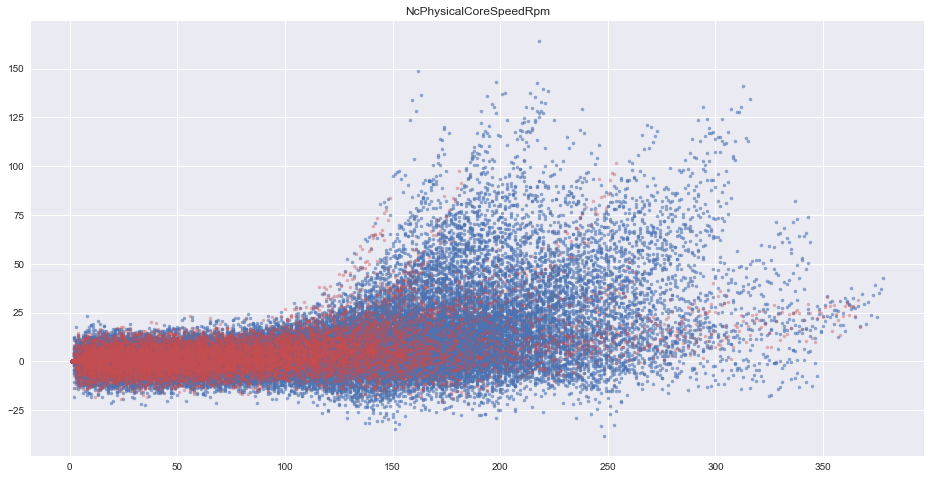

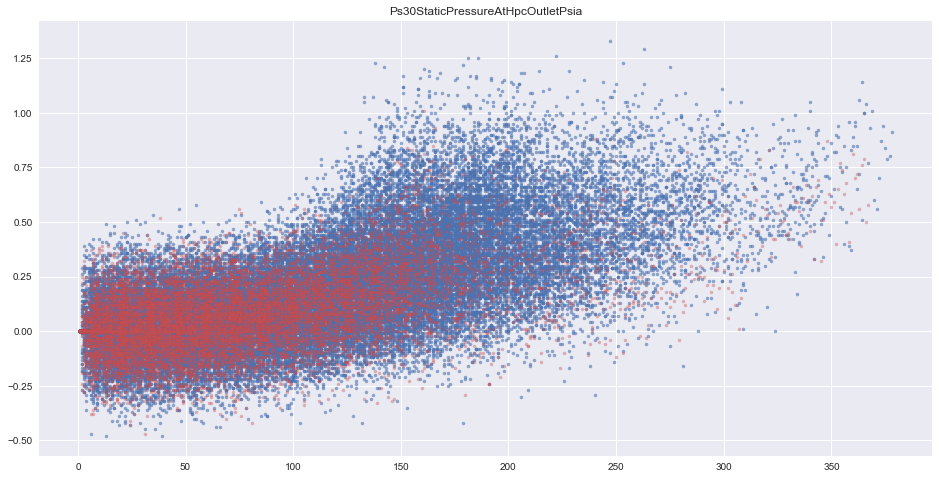

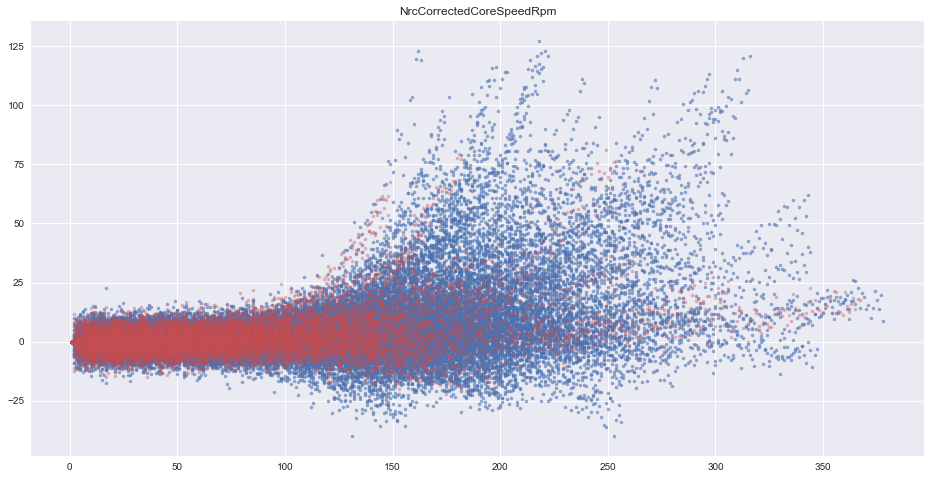

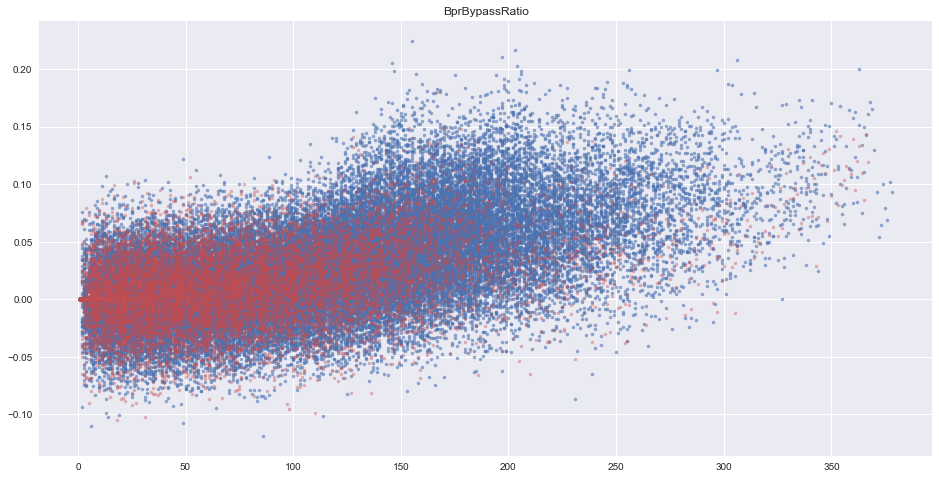

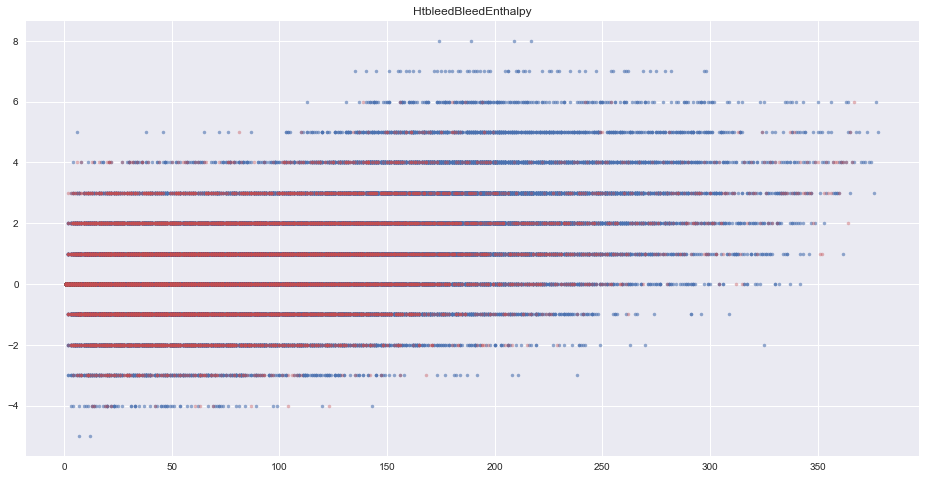

In [6]:
cp = sns.color_palette(n_colors=6)
for c in ["T30TotalTemperatureAtHpcOutletR", "T50TotalTemperatureAtLptOutletR",
          "NcPhysicalCoreSpeedRpm",  "Ps30StaticPressureAtHpcOutletPsia",
          "NrcCorrectedCoreSpeedRpm", "BprBypassRatio", "HtbleedBleedEnthalpy"]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in trn.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c] - _g[c].iloc[0], '.', c=cp[0], alpha=.6)    
    for e, g in tst.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c] - _g[c].iloc[0], '.', c=cp[2], alpha=.4)    
    plt.show()

In [24]:
offset_features = ["T30TotalTemperatureAtHpcOutletR", "T50TotalTemperatureAtLptOutletR",
 "NcPhysicalCoreSpeedRpm",  "Ps30StaticPressureAtHpcOutletPsia",
 "NrcCorrectedCoreSpeedRpm", "BprBypassRatio", "HtbleedBleedEnthalpy"]
offset_trn = trn[offset_features + ['Engine', 'FlightRegime', 'FlightNo']].copy()
for f in offset_features:
    print("Offset Feature =", f)
    for eng in offset_trn.Engine.unique():
        for regime in offset_trn.FlightRegime.unique():
            offset_trn.loc[(offset_trn.Engine==eng) & (offset_trn.FlightRegime==regime), f] -=\
            offset_trn.loc[(offset_trn.Engine==eng) & (offset_trn.FlightRegime==regime), f].iloc[0]

Offset Feature = T30TotalTemperatureAtHpcOutletR
Offset Feature = T50TotalTemperatureAtLptOutletR
Offset Feature = NcPhysicalCoreSpeedRpm
Offset Feature = Ps30StaticPressureAtHpcOutletPsia
Offset Feature = NrcCorrectedCoreSpeedRpm
Offset Feature = BprBypassRatio
Offset Feature = HtbleedBleedEnthalpy


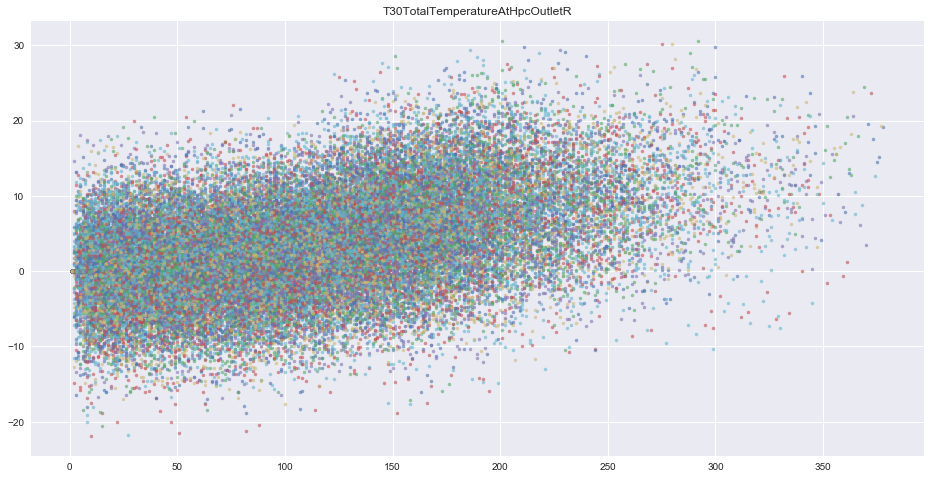

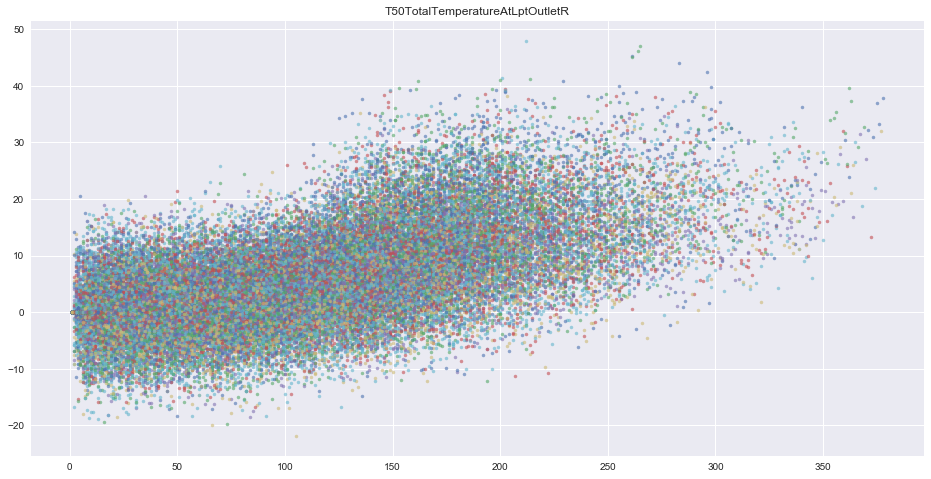

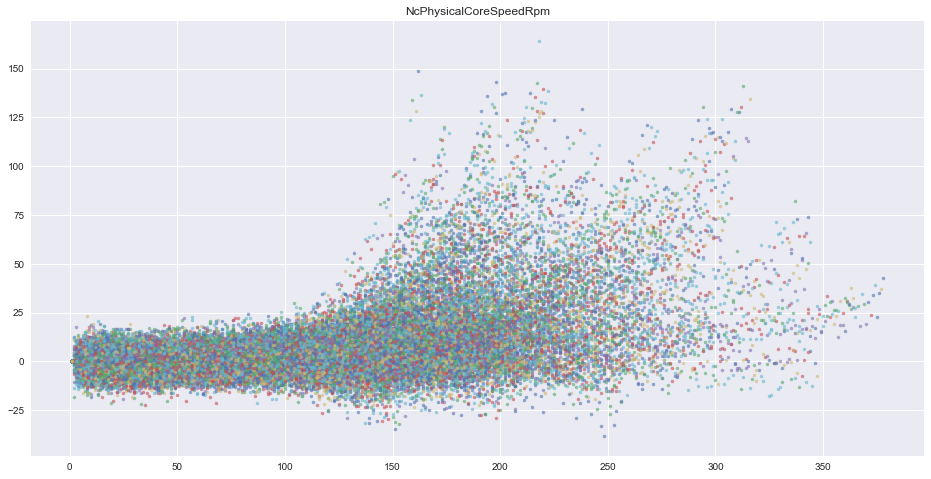

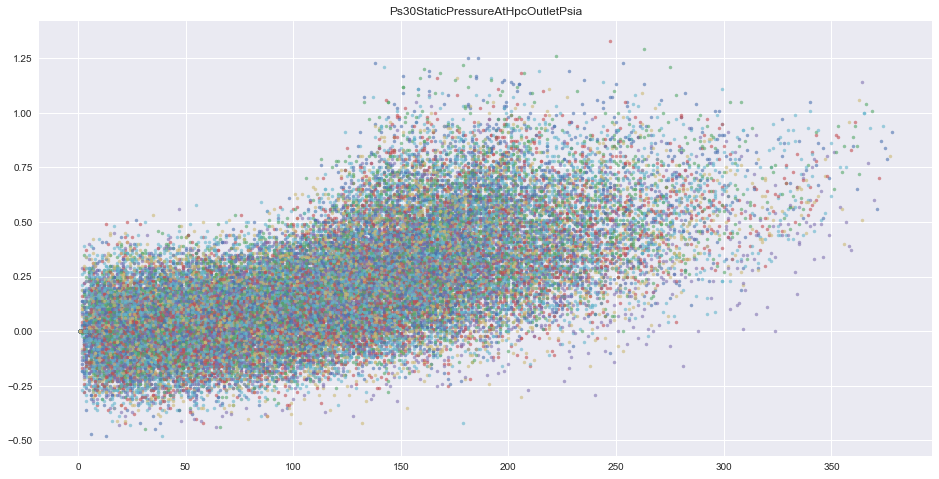

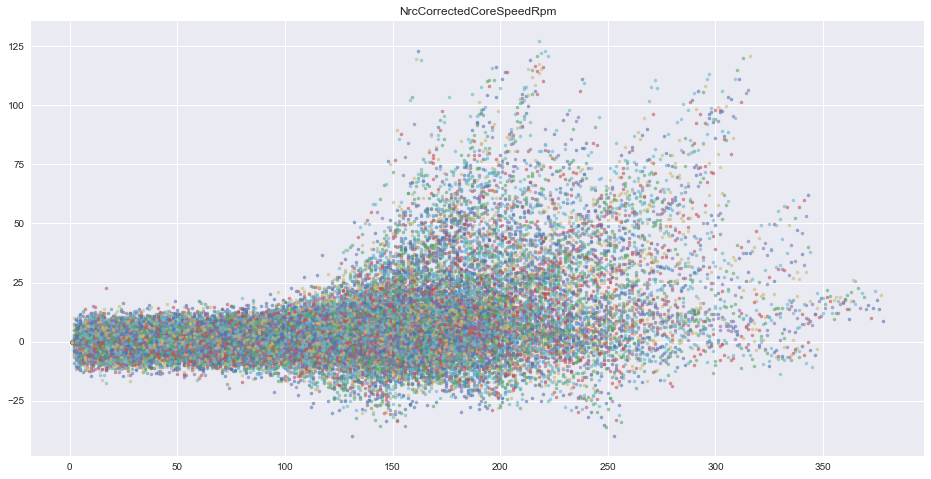

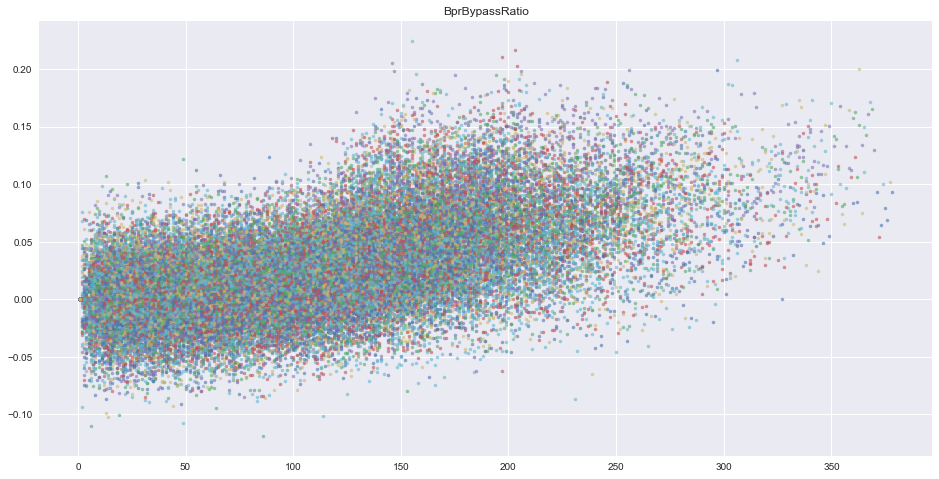

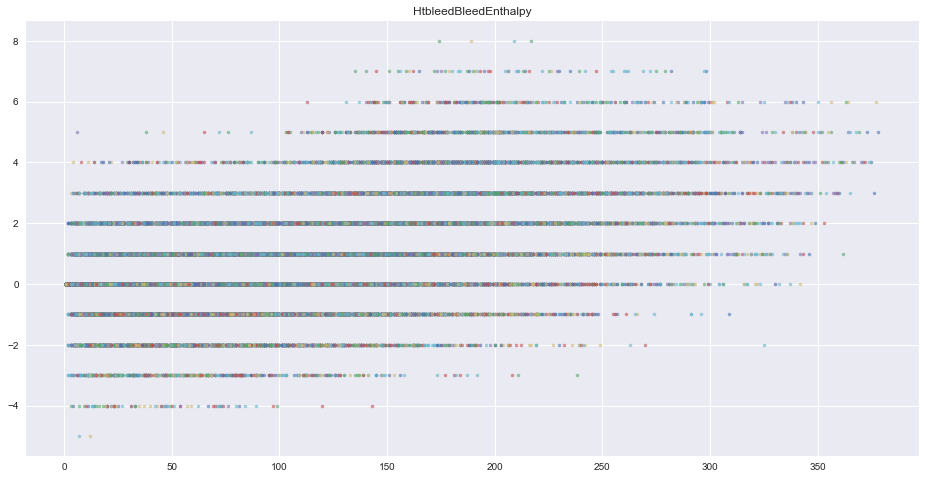

In [26]:
for c in ["T30TotalTemperatureAtHpcOutletR", "T50TotalTemperatureAtLptOutletR",
          "NcPhysicalCoreSpeedRpm",  "Ps30StaticPressureAtHpcOutletPsia",
          "NrcCorrectedCoreSpeedRpm", "BprBypassRatio", "HtbleedBleedEnthalpy"]:
    plt.figure(figsize=(16, 8))
    plt.title(c)
    for e, g in offset_trn.groupby('Engine'):
        for r, _g in g.groupby(['FlightRegime']):
            plt.plot(_g['FlightNo'], _g[c], '.', c=cp[r-1], alpha=.6) 